In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. 
 

datasets boston = datasets.load_boston() 
 
features = pd.DataFrame(boston.data, columns=boston.feature_names) 
 
targets = boston.target 
 
 
 
 
NOTE:ThesolutionsharedthroughGithubshouldcontainthesource 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = pd.DataFrame(boston.data,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = boston.target
y = pd.DataFrame(y,columns=['Target'])


In [7]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


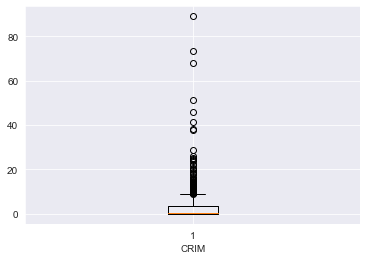

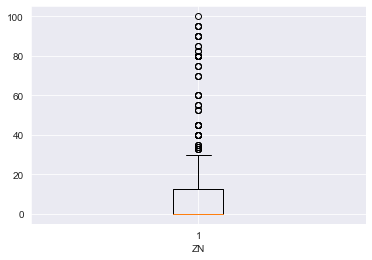

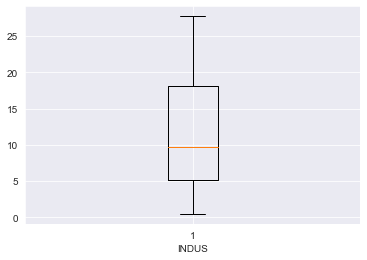

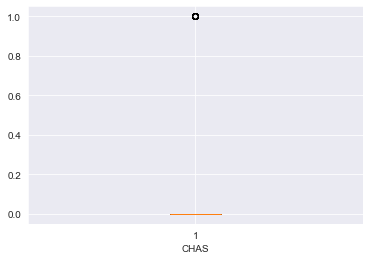

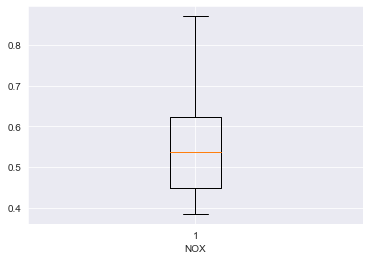

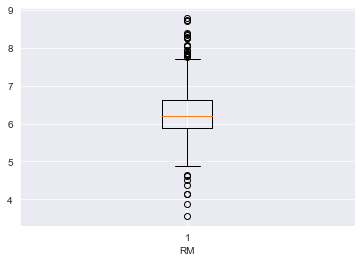

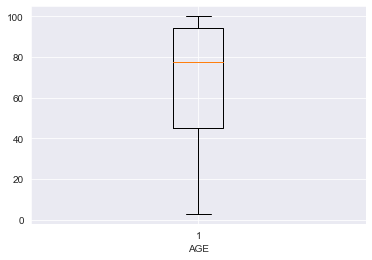

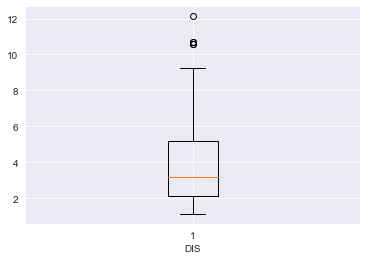

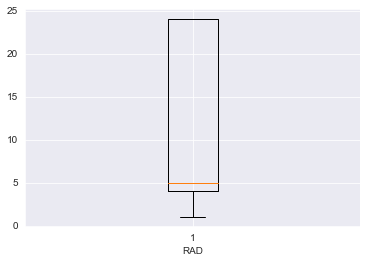

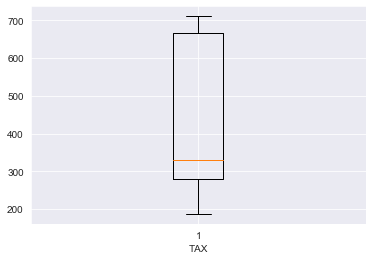

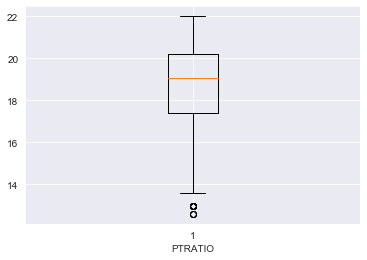

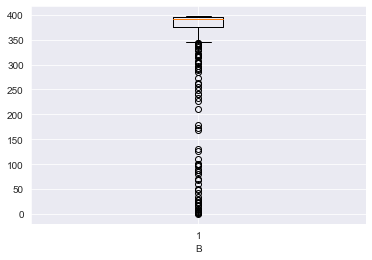

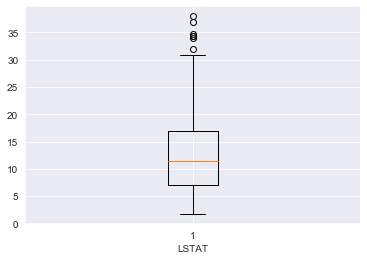

In [8]:
for i in x:
    plt.boxplot(x[i])
    plt.xlabel(i)
    plt.show()
    

In [9]:
x['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14c3259d408>,
 'caps': [<matplotlib.lines.Line2D at 0x14c3259dc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c3259aa48>],
 'medians': [<matplotlib.lines.Line2D at 0x14c325a0c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c325a6ac8>],
 'means': []}

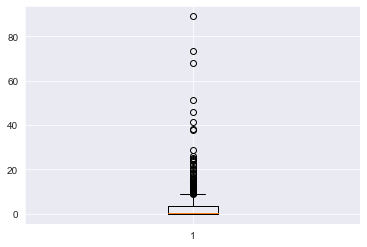

In [10]:
plt.boxplot(x['CRIM'])


In [11]:
x.loc[x['CRIM']>3,'CRIM'] = np.mean(x['CRIM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14c3260aec8>,
 'caps': [<matplotlib.lines.Line2D at 0x14c3260ce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c3260a548>],
 'medians': [<matplotlib.lines.Line2D at 0x14c32611dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c32611e88>],
 'means': []}

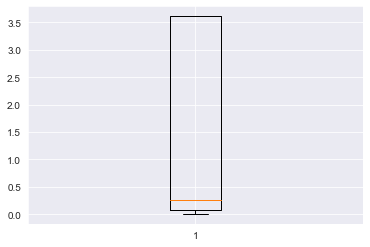

In [12]:
plt.boxplot(x['CRIM'])

In [13]:
x['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14c32675d88>,
 'caps': [<matplotlib.lines.Line2D at 0x14c3267ad08>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c32675408>],
 'medians': [<matplotlib.lines.Line2D at 0x14c3267fd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c3267fe08>],
 'means': []}

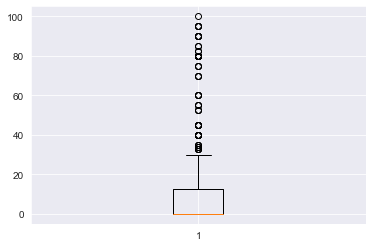

In [14]:
plt.boxplot(x['ZN'])

In [15]:
x.loc[x['ZN']>12,'ZN'] = np.mean(x['ZN'])

In [16]:
x['ZN'].describe()

count    506.000000
mean       3.009342
std        5.019035
min        0.000000
25%        0.000000
50%        0.000000
75%       11.363636
max       11.363636
Name: ZN, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14c326db908>,
 'caps': [<matplotlib.lines.Line2D at 0x14c326e5c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c326e1448>],
 'medians': [<matplotlib.lines.Line2D at 0x14c326eac08>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c326eacc8>],
 'means': []}

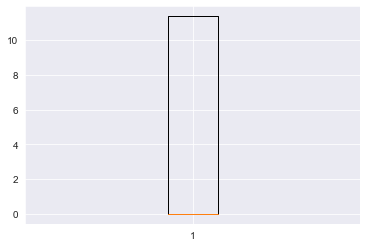

In [17]:
plt.boxplot(x['ZN'])

In [18]:
x['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x14c3274b9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x14c3274f988>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c32746f48>],
 'medians': [<matplotlib.lines.Line2D at 0x14c32754908>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c32754f48>],
 'means': []}

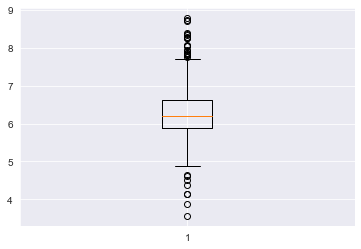

In [19]:
plt.boxplot(x['RM'])

In [20]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [21]:
x.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,11.363636,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [22]:
y.head(2)

,Target
0,24.0
1,21.6


In [23]:
x1 = x.copy()

y = np.ravel(y)
y1 = y.copy()

#### In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()

In [26]:
ss= ss.fit_transform(x)

In [27]:
x = pd.DataFrame(ss,columns=x.columns)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size= 0.3,random_state = 101)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((354, 13), (354,), (152, 13), (152,))

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:

rf = RandomForestRegressor()
model=rf.fit(X_train,Y_train)

# generate predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [31]:
test_predict=model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('AME:',mean_absolute_error(Y_test,test_predict))
print('MSE:',mean_squared_error(Y_test,test_predict))
print('RMSE:', np.sqrt(mean_squared_error(Y_test,test_predict)))
print('R Square:',r2_score(Y_test,test_predict))


AME: 2.6556973684210523
MSE: 13.256847223684211
RMSE: 3.640995361667495
R Square: 0.866443419483695


## R Square: 0.8544460944298997